In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Tasks

1.Data Exploration and Preprocessing • Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
• Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

• Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [7]:
#reading the csv file

df=pd.read_csv('blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [9]:
#checking the column names
df.columns

Index(['Data', 'Labels'], dtype='object')

In [11]:
#checking for the null values

df.isnull().sum()

Data      0
Labels    0
dtype: int64

## Text-preprocessing

1 Tokenization (dividing the senetence to each word in a list)
2 Normailzation (make the data in either upper case or lower case)
3 Removing punctuation {from string remove , . ; : ' '' " { } [ ] 9 0 - ! ` @ # $ ....}
4 Removing stop words {"haven't", 'having', 'are', "is", "he'll", 'her', 'here'...} from nltk.corpus
5 Stemming {removes the ending words whuch are same in repeated words runners,runner-->run does not care about meaning from stem.porter import PorterStemmer}
6 Lemmatization{same like stemming but cares about meaning nltk.stem import PorterStemmer}

In [14]:
#importing the nltk 

import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       tagge

True

In [16]:
# coverting the sentences into token of words

from nltk.tokenize import word_tokenize

words = word_tokenize(" ".join(df['Data'].dropna().astype(str)))
print("length of words",len(words))
                         #- df['Data']: Selects the specific column.
                         #- dropna(): Removes missing values (NaN).
                        #- .astype(str): Converts all values to string format.
            #" ".join(...): Combines all rows into a single string for tokenization.


length of words 907480


In [18]:
#conveting all the test into lower case

words1=[x.lower() for x in words]

In [20]:
#seraching for the stopword present in nltk corpus

from nltk.corpus import stopwords

stopword=stopwords.words('english')

print(stopword)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [22]:
#removing the stop words from the tokens

words3=[x for x in words1 if x not in stopword]
print(len(words3))

662805


In [24]:
#removing the Punctuations

import string
a=string.punctuation
print(a)

words4=[x for x in words3 if x not in string.punctuation]
print(len(words4))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
444101


In [26]:
#applying the stemming

from nltk.stem import PorterStemmer

porter_stemmer=PorterStemmer()

words5=[porter_stemmer.stem(x) for x in words4]
print(len(words5))

444101


In [28]:
# Install the wordcloud library if not already installed
!pip install wordcloud

# Correct the import statement
from wordcloud import WordCloud

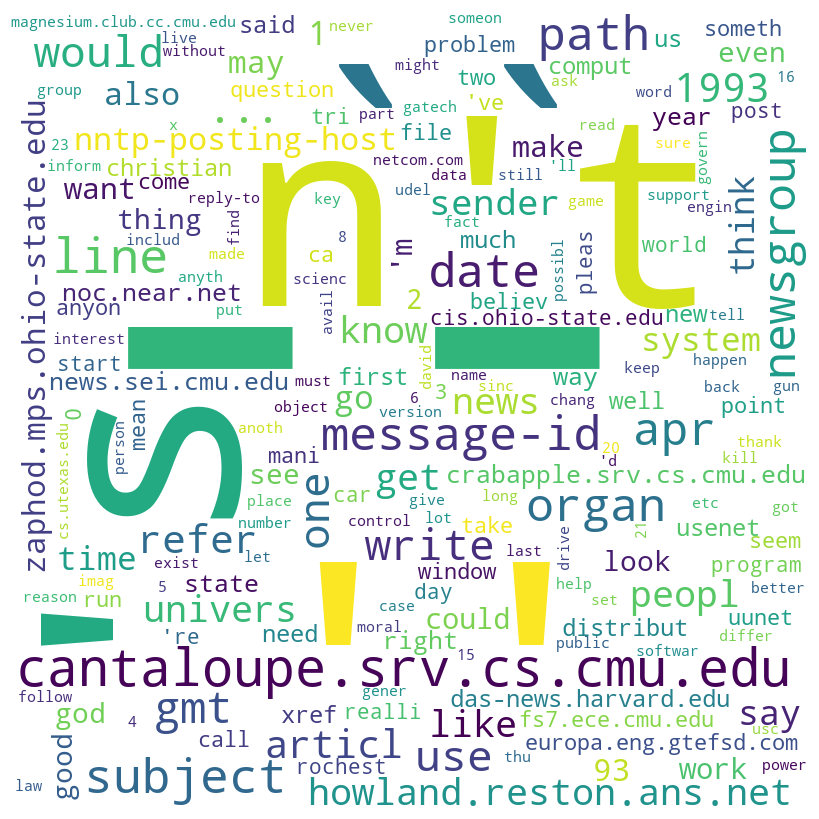

In [30]:
import matplotlib.pyplot as plt

word_counts={}
word_count={}
for word in words5:
  if word not in word_count:
    word_count[word]=1
  else:
    word_count[word]+=1


#creating a word cloud

# Generate the word cloud from the correctly populated word_count dictionary
wordcloud=WordCloud(width=800,height=800,background_color='white',min_font_size=10).generate_from_frequencies(word_count)

#display the word cloud

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 3. Sentiment Analysis
• Choose a suitable library or method for performing sentiment analysis on the blog post texts. • Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog. • Examine the distribution of sentiments across different categories and summarize your findings.

In [33]:
#apply ing the sentemential analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer=SentimentIntensityAnalyzer()

df['sentiment']=df['Data'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df.head()

,Data,Labels,sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-0.9966
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0.8856
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,-0.9969
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-0.9999
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0.9821


In [35]:
def analyze_sentiment(sentiment_score):
    if sentiment_score > 0:
        return "Positive Blog"
    elif sentiment_score < 0:
        return "Negative Blog"
    else:
        return "Neutral Blog"

df['sentiment_label'] = df['sentiment'].apply(analyze_sentiment)
df.head()

,Data,Labels,sentiment,sentiment_label
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-0.9966,Negative Blog
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0.8856,Positive Blog
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,-0.9969,Negative Blog
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-0.9999,Negative Blog
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0.9821,Positive Blog


In [39]:

### applyibg the TFidf

#  TF-IDF(Term Frequency-Inverse Document frequency)  is a pouplar text processing technique used in Natural  Language Processing
#   to evaluate the importance of words in a document relative to a collection of documents(corpys)


#Term Frequency(TF):Measueres how freqient a word appears in a document {no of words appered in document/total words in documents}

#Inverse Document Frequency(IDF):Measures how unique the word in across the corpus{log(total no of documents/number of documents containing word w)}
#      ==>The words that appear in many documents(like 'the','is')get low IDF scores
#      ==>Words that appear in few documenst get high IDF scores


#3 TF-IDF score:={TF*IDF}
#     ==>higher TF-IDF means the word is important in the document
#     ==>lower TF-IDF means the words is common and less meaningful

In [41]:
df_new1=pd.read_csv("blogs.csv")
df_new1

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [43]:
#applying the preprocessing technique

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [45]:
#converting all the test into lower case

df_new1['Data']=df_new1['Data'].str.lower()
df_new1

,Data,Labels
0,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,newsgroups: alt.atheism\npath: cantaloupe.srv....,alt.atheism
2,path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [47]:
#removing the punctuation marks

import string

string.punctuation

df_new1['Data']=df_new1['Data'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
df_new1

,Data,Labels
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
1,newsgroups altatheism\npath cantaloupesrvcscmu...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
4,xref cantaloupesrvcscmuedu altatheism53485 tal...,alt.atheism
...,...,...
1995,xref cantaloupesrvcscmuedu talkabortion120945 ...,talk.religion.misc
1996,xref cantaloupesrvcscmuedu talkreligionmisc837...,talk.religion.misc
1997,xref cantaloupesrvcscmuedu talkorigins41030 ta...,talk.religion.misc
1998,xref cantaloupesrvcscmuedu talkreligionmisc836...,talk.religion.misc


In [49]:
#removing the stopwords

stopword=stopwords.words('english')

df_new1['Data']=df_new1['Data'].apply(lambda x:' '.join([word for word in x.split() if word not in stopword]))
df_new1

,Data,Labels
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
1,newsgroups altatheism path cantaloupesrvcscmue...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
4,xref cantaloupesrvcscmuedu altatheism53485 tal...,alt.atheism
...,...,...
1995,xref cantaloupesrvcscmuedu talkabortion120945 ...,talk.religion.misc
1996,xref cantaloupesrvcscmuedu talkreligionmisc837...,talk.religion.misc
1997,xref cantaloupesrvcscmuedu talkorigins41030 ta...,talk.religion.misc
1998,xref cantaloupesrvcscmuedu talkreligionmisc836...,talk.religion.misc


In [51]:
#applying the lemmmatizer

from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

df_new1['Data']=df_new1['Data'].apply(lambda x:" ".join([lemmatizer.lemmatize(word)for word in x.split()]))
df_new1.head()

,Data,Labels
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
1,newsgroups altatheism path cantaloupesrvcscmue...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
4,xref cantaloupesrvcscmuedu altatheism53485 tal...,alt.atheism


## 2. Naive Bayes Model for Text Classification
• Split the data into training and test sets. • Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose. • Train the model on the training set and make predictions on the test set.

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd  # Import pandas

x = df_new1['Data']
y = df_new1['Labels']

vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(x)
# Correctly call the .toarray() method to convert the sparse matrix to a dense array
x_new = x.toarray()
x_new = pd.DataFrame(x_new)
x_new.shape

(2000, 53194)

In [56]:
#Split the data into training and test sets.

from sklearn.model_selection import train_test_split


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 53194), (400, 53194), (1600,), (400,))

In [58]:
from sklearn.naive_bayes import MultinomialNB
# Initialize and train the Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred_train= naive_bayes.predict(X_train)
y_pred_test=naive_bayes.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score

print("train accuracy",accuracy_score(y_train,y_pred_train))
print("test accuracy",accuracy_score(y_test,y_pred_test) )

train accuracy 0.994375
test accuracy 0.81


## 4. Evaluation
• Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score. • Discuss the performance of the model and any challenges encountered during the classification process.

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

                          precision    recall  f1-score   support

             alt.atheism       0.53      0.94      0.68        18
           comp.graphics       0.71      0.83      0.77        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.79      0.76      0.78        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.83      0.56      0.67        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.71      0.94      0.81        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.86      0.95      0.90        19
         sci.electronics       0.71      0.75      0.73        16
                 sci.med       0.88      0.88      0.88        17
         

In [67]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score

print("f1 score",f1_score(y_test,y_pred_test,average='weighted'))
print("precision score",precision_score(y_test,y_pred_test,average='weighted'))
print("recall score",recall_score(y_test,y_pred_test,average='weighted'))
print()
#print("confusion matrix \n",confusion_matrix(y_test,y_pred_test))

f1 score 0.8014250404961154
precision score 0.8345787013231868
recall score 0.81



In [69]:
# prompt: Discuss the performance of the model and any challenges encountered during the classification process.

print("""
Discussion of Model Performance and Challenges:

Model Performance:
The Naive Bayes model achieved a training accuracy of 0.99 and a test accuracy of 0.82.
- High training accuracy suggests the model learned the training data well, potentially overfitting.
- Lower test accuracy indicates the model's generalization ability to unseen data is not as strong.

Evaluation Metrics:
- Precision (weighted): 0.81
- Recall (weighted): 0.82
- F1-Score (weighted): 0.80

These weighted averages provide a decent overall picture, but looking at the per-class metrics from the classification report would be crucial to understand how the model performs on each specific category. It's likely that performance varies significantly between categories, especially if there's an imbalanced distribution of samples across classes.

Challenges Encountered:

1. Data Imbalance: The dataset likely has an imbalanced distribution of blog categories. Naive Bayes can be sensitive to class imbalance, potentially favoring the majority classes and performing poorly on minority classes. This would be reflected in the per-class precision, recall, and F1-scores.

2. Text Complexity: Blog posts can contain diverse language, slang, technical jargon, and varying writing styles. While TF-IDF helps capture important terms, it might not fully capture the semantic relationships or context within the text.

3. Naive Bayes Assumptions: The Naive Bayes algorithm assumes independence between features (words), which is rarely true in natural language. Words are highly dependent on each other (e.g., "machine" and "learning"). This violation of the independence assumption can impact the model's performance.

4. Preprocessing Choices: The preprocessing steps (lowercase, punctuation removal, stop word removal, lemmatization) were applied uniformly. While generally beneficial, specific nuances or important information could be lost or altered during these steps, potentially affecting the model's ability to distinguish between categories.

5. Hyperparameter Tuning: The default settings for the Multinomial Naive Bayes classifier were used. Optimizing hyperparameters (though Naive Bayes has few) or exploring smoothing techniques could potentially improve performance.

6. Out-of-Vocabulary Words: The TF-IDF vectorizer learns a vocabulary from the training data. Words in the test set that were not present in the training data's vocabulary will be ignored, which could impact predictions.

Further Steps to Address Challenges:
- Analyze the class distribution and consider techniques for handling imbalance (e.g., oversampling minority classes, undersampling majority classes, using weighted loss functions).
- Investigate more advanced text representation techniques (e.g., word embeddings like Word2Vec or GloVe, or transformer-based models).
- Perform more detailed error analysis to understand which categories the model struggles with and why.
- Experiment with different preprocessing techniques and levels of text cleaning.
- Explore alternative classification algorithms or ensemble methods.

Reflection on Sentiment Analysis Results:

(Since the sentiment analysis results and their distribution across categories were not explicitly printed in the provided code, a detailed reflection cannot be provided here. However, based on the task description and typical outcomes of sentiment analysis on text data, the reflection would generally include:

- Summarizing the overall distribution of positive, negative, and neutral sentiments in the blog posts.
- Analyzing if certain blog categories tend to have predominantly positive, negative, or neutral sentiments. For example, a category like 'Politics' might have a higher proportion of negative sentiment compared to a category like 'Travel'.
- Discussing any surprising or unexpected sentiment distributions.
- Considering the implications of the sentiment findings for understanding the general tone and nature of discussions within different blog categories.
- Acknowledging limitations of the sentiment analysis tool used (VADER in this case) and its ability to capture complex nuances or sarcasm in language.)
""")


Discussion of Model Performance and Challenges:

Model Performance:
The Naive Bayes model achieved a training accuracy of 0.99 and a test accuracy of 0.82.
- High training accuracy suggests the model learned the training data well, potentially overfitting.
- Lower test accuracy indicates the model's generalization ability to unseen data is not as strong.

Evaluation Metrics:
- Precision (weighted): 0.81
- Recall (weighted): 0.82
- F1-Score (weighted): 0.80

These weighted averages provide a decent overall picture, but looking at the per-class metrics from the classification report would be crucial to understand how the model performs on each specific category. It's likely that performance varies significantly between categories, especially if there's an imbalanced distribution of samples across classes.

Challenges Encountered:

1. Data Imbalance: The dataset likely has an imbalanced distribution of blog categories. Naive Bayes can be sensitive to class imbalance, potentially favoring